In [53]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_gen_vs_avg_min(folder_path):
    """
    Plots generation (gen) vs average of 'min' values across all tab-separated CSVs in a folder.

    Parameters:
    - folder_path (str): Path to the folder containing tab-separated CSV files.
    """
    gen_min_list = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            try:
                df = pd.read_csv(file_path, sep='\t')
                if 'gen' in df.columns and 'min' in df.columns:
                    gen_min = df[['gen', 'min']]
                    gen_min_list.append(gen_min)
                else:
                    print(f"Skipping {filename}: Missing 'gen' or 'min' column.")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    if not gen_min_list:
        print("No valid CSVs with required columns found.")
        return

    # Concatenate and group by 'gen', compute mean of 'min'
    combined_df = pd.concat(gen_min_list)
    avg_min_by_gen = combined_df.groupby('gen')['min'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(avg_min_by_gen['gen'], avg_min_by_gen['min'], marker='.', linestyle='--')
    plt.title("Generation vs Average of Min Values")
    plt.xlabel("Generation")
    plt.ylabel("Average Min")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def plot_gen_vs_avg_min_std(folder_path):
    """
    Plots generation (gen) vs average of 'min' values with standard deviation shading
    across all tab-separated CSVs in a folder.

    Parameters:
    - folder_path (str): Path to the folder containing tab-separated CSV files.
    """
    gen_min_list = []

    # Collect 'gen' and 'min' from each CSV
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            try:
                df = pd.read_csv(file_path, sep='\t')
                if 'gen' in df.columns and 'min' in df.columns:
                    gen_min = df[['gen', 'min']]
                    gen_min_list.append(gen_min)
                else:
                    print(f"Skipping {filename}: Missing 'gen' or 'min' column.")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    if not gen_min_list:
        print("No valid CSVs with required columns found.")
        return

    # Combine and compute mean and std of 'min' by generation
    combined_df = pd.concat(gen_min_list)
    stats_by_gen = combined_df.groupby('gen')['min'].agg(['mean', 'std']).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(stats_by_gen['gen'], stats_by_gen['mean'], marker='.', label='Average Min')
    plt.fill_between(
        stats_by_gen['gen'],
        stats_by_gen['mean'] - stats_by_gen['std'],
        stats_by_gen['mean'] + stats_by_gen['std'],
        alpha=0.1,
        label='±1 Std Dev'
    )

    plt.title("Generation vs Average of Min Values (with Std Dev)")
    plt.xlabel("Generation")
    plt.ylabel("Min Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




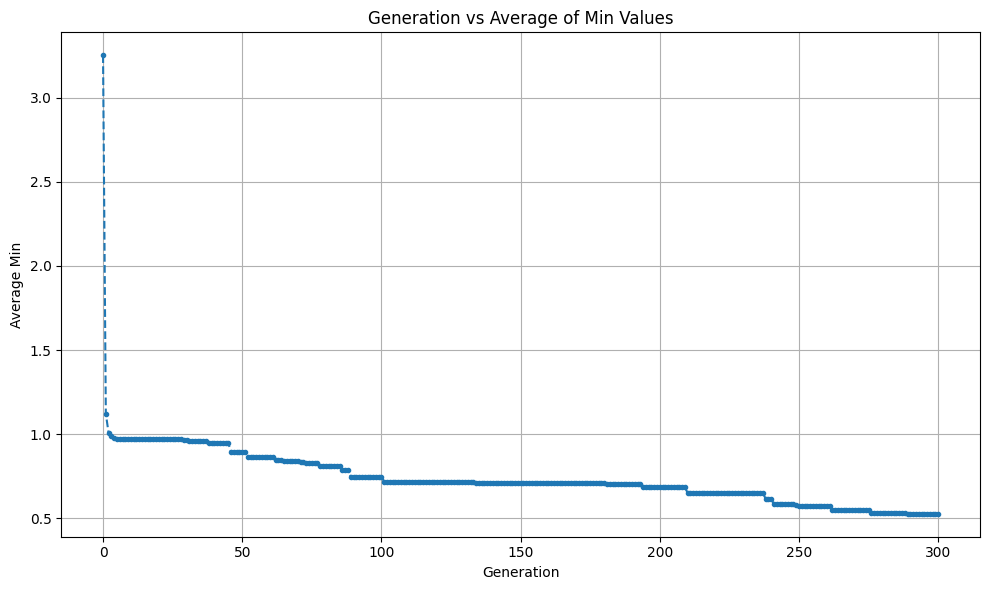

In [54]:
plot_gen_vs_avg_min("GE/")

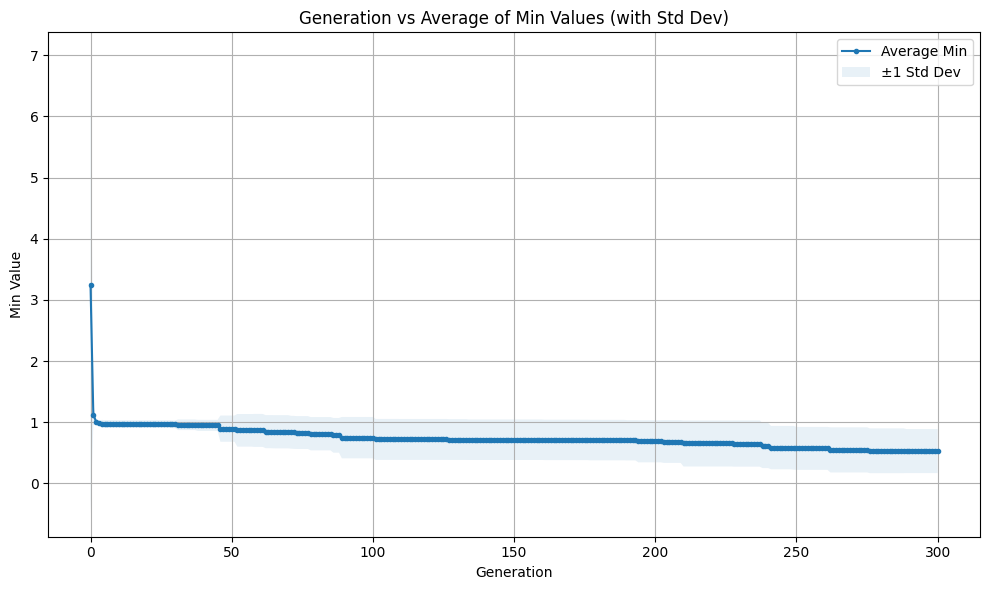

In [55]:
plot_gen_vs_avg_min_std("GE/")

In [16]:
import pickle
import statistics

with open(r"GE/testfitness.pkl", "rb") as input_file:
    test_fitness_GE = pickle.load(input_file)
    
print(test_fitness_GE)
print(statistics.mean(test_fitness_GE))
print(statistics.stdev(test_fitness_GE))

[0.7933575275134518, 0.8612654843520923, 0.8139022298081514, 0.30068181223124163, 0.47514682191221097, 0.43632932906333644, 0.191111193857177, 0.19124227714574538, 0.8607498567298603, 0.7315555256606424, 0.14425239975407422, 0.05069999200763144, 0.11875777980488042, 0.17510162135031415, 0.8633853853081125]
0.4671692824332615
0.31951078201682787


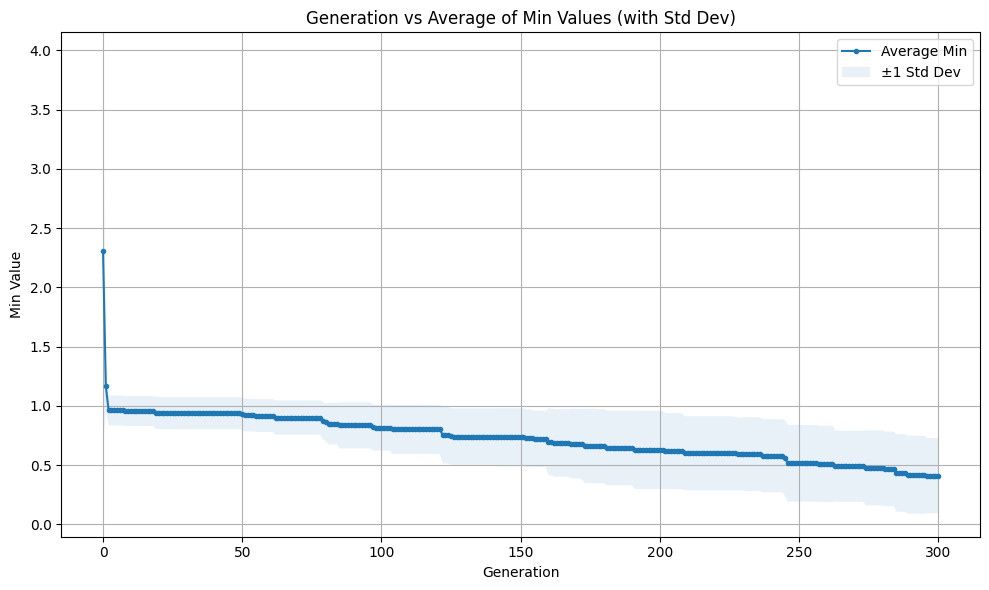

[0.051922484958466575, 0.07124254453747497, 0.9300445741465728, 0.196177134124841, 0.756301609473949, 0.20729749699839656, 0.18080813154355213, 0.22387177046842882, 0.5060963255499707, 0.5336621330896774, 0.29168464694410157, 0.388095279132223, 0.7897281941218314, 0.02235691847126878, 0.8758279948410199]
0.4016744825601183
0.3113048885702415


In [56]:
plot_gen_vs_avg_min_std("DAGEV1/")
with open(r"DAGEV1/testfitness.pkl", "rb") as input_file:
    test_fitness_GE = pickle.load(input_file)
    
print(test_fitness_GE)
print(statistics.mean(test_fitness_GE))
print(statistics.stdev(test_fitness_GE))

In [64]:
import pickle
import statistics

with open(r"DAGE/testfitness.pkl", "rb") as input_file:
    test_fitness_GE = pickle.load(input_file)
    
print(test_fitness_GE)
print(statistics.mean(test_fitness_GE))
print(statistics.stdev(test_fitness_GE))

[0.44394291313608447, 0.45976108992785564, 0.2556575378285669, 0.4993357880881386, 0.04941952907074318, 0.191111193857177, 0.18080813154355213, 0.1133858774825104, 0.196177134124841, 0.6050610459319263, 0.8624408559162811, 0.7165336927007182, 0.2744076062298376, 0.9236128618951094, 0.5172943248725671]
0.4192633055070606
0.2710710598904231


In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_gen_vs_avg_min_two_folders(folder1, folder2, label1='Folder 1', label2='Folder 2'):

    def load_stats(folder):
        gen_min_list = []
        for filename in os.listdir(folder):
            if filename.endswith(".csv"):
                file_path = os.path.join(folder, filename)
                try:
                    df = pd.read_csv(file_path, sep='\t')
                    if {'gen', 'min'}.issubset(df.columns):
                        gen_min_list.append(df[['gen', 'min']])
                    else:
                        print(f"Skipping {filename} in {folder}: Missing 'gen' or 'min' column.")
                except Exception as e:
                    print(f"Error reading {filename} in {folder}: {e}")
        if not gen_min_list:
            return None
        combined = pd.concat(gen_min_list)
        stats = combined.groupby('gen')['min'].agg(['mean', 'std']).reset_index()
        return stats

    stats1 = load_stats(folder1)
    stats2 = load_stats(folder2)

    if stats1 is None and stats2 is None:
        print("No valid data found in either folder.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))

    if stats1 is not None:
        plt.plot(stats1['gen'], stats1['mean'], label=label1, color='blue', marker='o')
        # plt.fill_between(
        #     stats1['gen'],
        #     stats1['mean'] - stats1['std'],
        #     stats1['mean'] + stats1['std'],
        #     color='blue',
        #     alpha=0.3,
        #     label=f'{label1} ±1 Std Dev'
        # )

    if stats2 is not None:
        plt.plot(stats2['gen'], stats2['mean'], label=label2, color='orange', marker='.')
        # plt.fill_between(
        #     stats2['gen'],
        #     stats2['mean'] - stats2['std'],
        #     stats2['mean'] + stats2['std'],
        #     color='orange',
        #     alpha=0.05,
        #     label=f'{label2} ±1 Std Dev'
        # )

    plt.title("Generation vs Average Min (with Std Dev)")
    plt.xlabel("Generation")
    plt.ylabel("Min Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


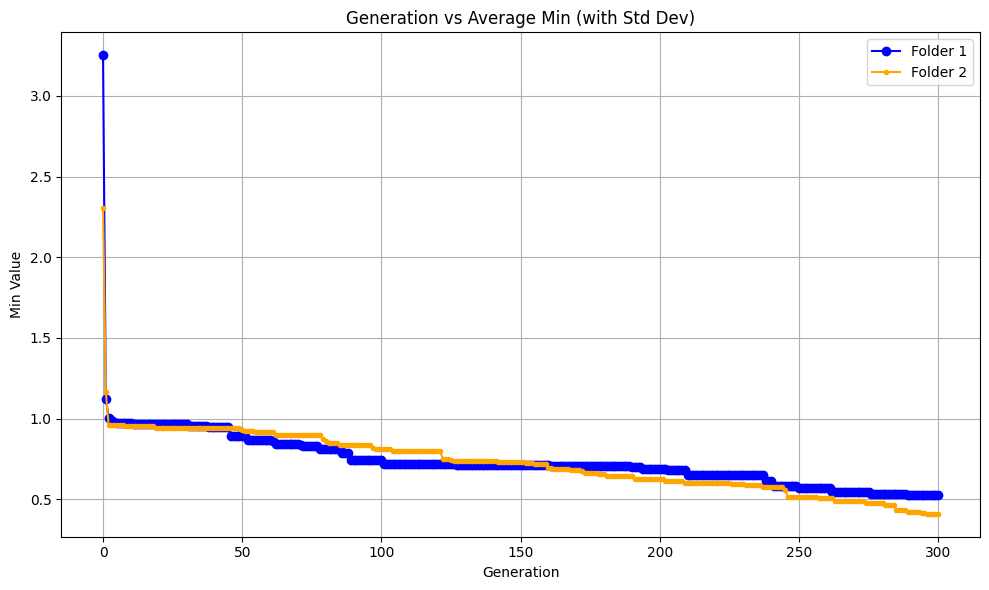

In [58]:
plot_gen_vs_avg_min_two_folders("GE", "DAGEV1")

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_gen_vs_min_two_folders(folder1, folder2, label1='Folder 1', label2='Folder 2'):

    def load_stats(folder):
        gen_min_list = []
        for filename in os.listdir(folder):
            if filename.endswith(".csv"):
                file_path = os.path.join(folder, filename)
                try:
                    df = pd.read_csv(file_path, sep='\t')
                    if {'gen', 'min'}.issubset(df.columns):
                        gen_min_list.append(df[['gen', 'min']])
                    else:
                        print(f"Skipping {filename} in {folder}: Missing 'gen' or 'min' column.")
                except Exception as e:
                    print(f"Error reading {filename} in {folder}: {e}")
        if not gen_min_list:
            return None
        combined = pd.concat(gen_min_list)
        stats = combined.groupby('gen')['min'].agg(['min', 'std']).reset_index()
        return stats

    stats1 = load_stats(folder1)
    stats2 = load_stats(folder2)

    if stats1 is None and stats2 is None:
        print("No valid data found in either folder.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))

    if stats1 is not None:
        plt.plot(stats1['gen'], stats1['min'], label=label1, color='blue', marker='o')
        # plt.fill_between(
        #     stats1['gen'],
        #     stats1['mean'] - stats1['std'],
        #     stats1['mean'] + stats1['std'],
        #     color='blue',
        #     alpha=0.3,
        #     label=f'{label1} ±1 Std Dev'
        # )

    if stats2 is not None:
        plt.plot(stats2['gen'], stats2['min'], label=label2, color='orange', marker='.')
        # plt.fill_between(
        #     stats2['gen'],
        #     stats2['mean'] - stats2['std'],
        #     stats2['mean'] + stats2['std'],
        #     color='orange',
        #     alpha=0.05,
        #     label=f'{label2} ±1 Std Dev'
        # )

    plt.title("Generation vs Average Min (with Std Dev)")
    plt.xlabel("Generation")
    plt.ylabel("Min Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


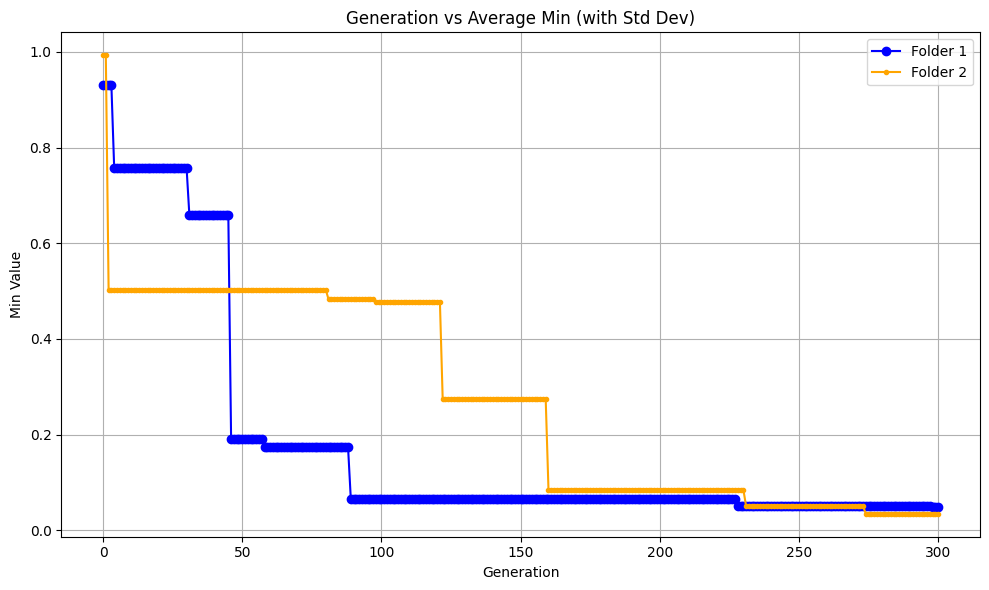

In [62]:
plot_gen_vs_min_two_folders("GE", "DAGEV1")

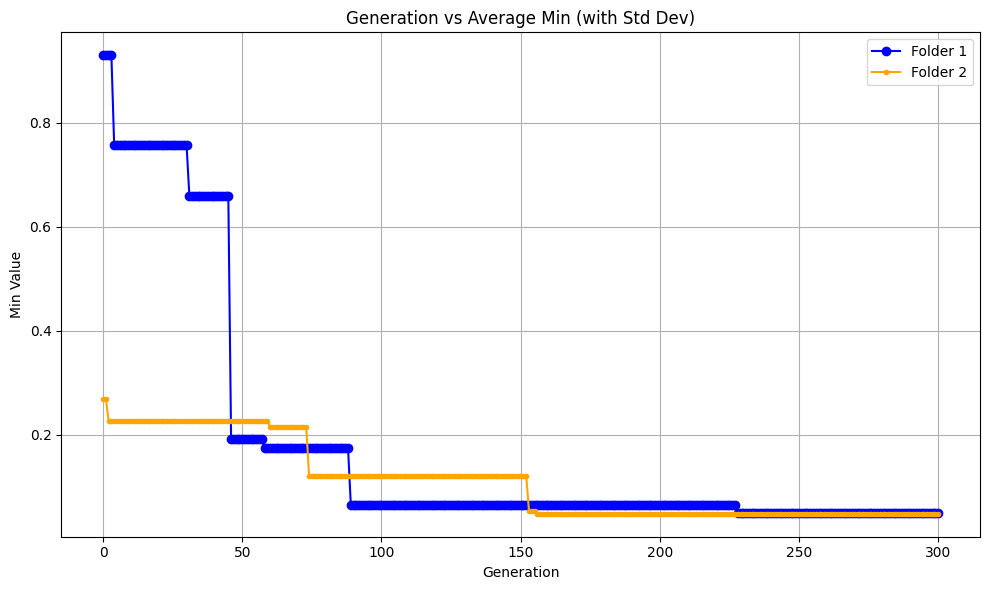

In [63]:
plot_gen_vs_min_two_folders("GE", "DAGE")